## Homework 2 Solutions

### Personal network surveys

In this homework, we will be analyzing some data from the [General Social Survey](http://gss.norc.org/) (GSS).
The GSS is the survey that was the basis of the debate over whether or not Americans are becoming more socially isolated, which we discussed in class.

In [20]:
from IPython.core.display import HTML
from datascience import *

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [21]:
import os
os.getcwd()

'/Users/Mia/repos/demog180-sp2019-admin/hwk/hw2'

In [22]:
#Loading testing data
from client.api.notebook import Notebook 
hw02 = Notebook('hw02.ok')
_ = hw02.auth(inline=True)

Assignment: Demography180 Homework 02
OK, version v1.13.11

Successfully logged in as ruijie_zhong@berkeley.edu


The file `GSS.csv` has an extract from the GSS which we will analyze today.

Here is the [codebook](http://gss.norc.org/documents/codebook/GSS_Codebook.pdf) for the entire GSS. Of course, the GSS is huge, so you will have to search through for the variable names included in this extract. (Don't do this by hand -- use your pdf viewer's search function.)

Read the GSS extract into a Table called `gss_data`.

In [23]:
url = 'GSS.csv'
gss_data = Table.read_table(url)

**Question.** How many rows and how many columns does `gss_data` have? Print out the first several rows to take a look at its contents.

In [5]:
gss_number_of_rows = ...
gss_number_of_cols = ...

print("num rows: ", gss_number_of_rows)
print("num cols: ", gss_number_of_cols)

num rows:  Ellipsis
num cols:  Ellipsis


In [24]:
# SOLUTION
gss_number_of_rows = gss_data.num_rows
gss_number_of_cols = gss_data.num_columns

print("num rows: ", gss_number_of_rows)
print("num cols: ", gss_number_of_cols)

num rows:  59599
num cols:  20


In [6]:
_ = hw02.grade('q1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [7]:
gss_data

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1972,1,5,23,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,2,1,70,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,3,1,48,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,4,1,27,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,5,1,61,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,6,5,26,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,7,3,28,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,8,5,27,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,9,5,21,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1
1972,10,1,30,-1,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1


**Question** What range of years is covered by this dataset? Answer this by finding the largest and smallest year.

In [ ]:
largest_year = ...
smallest_year = ...

print("earliest year: ", smallest_year)
print("latest year: ", largest_year)

In [25]:
# SOLUTION
largest_year = np.max(gss_data.column('year'))
smallest_year = np.min(gss_data.column('year'))

print("earliest year: ", smallest_year)
print("latest year: ", largest_year)

earliest year:  1972
latest year:  2014


In [9]:
_ = hw02.grade('q2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



We are interested in the years when the 'important matters' question was asked of survey respondents. It turns out that this question was only asked for 1985 and 2004. In order to continue with our analysis, we will pick out only the rows of the dataset that correspond to the years we are interested in.

**Question** Make two new datasets: `gss_1985` and `gss_2004` which have only the responses from 1985 and from 2004.

In [ ]:
gss_1985 = ...
gss_2004 = ...

In [26]:
# SOLUTION
gss_1985 = gss_data.where('year', are.equal_to(1985))
gss_2004 = gss_data.where('year', are.equal_to(2004))

In [11]:
_ = hw02.grade('q3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [12]:
_ = hw02.grade('q4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question** How many responses are there from 1985, and how many from 2004? 

In [ ]:
responses_from_1985 = ...
responses_from_2004 = ...

In [27]:
# SOLUTION
responses_from_1985 = gss_1985.num_rows
responses_from_2004 = gss_2004.num_rows

In [14]:
_ = hw02.grade('q5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question** Make a table of the responses to the `numgiven` question for each year.

In [ ]:
gss_1985_numgiven =...

In [ ]:
gss_2004_numgiven = ...

In [28]:
# SOLUTION
gss_1985_numgiven = gss_1985.group('numgiven')
gss_1985_numgiven

numgiven,count
0,136
1,228
2,235
3,321
4,233
5,294
6,84
9,3


In [29]:
# SOLUTION
gss_2004_numgiven = gss_2004.group('numgiven')
gss_2004_numgiven

numgiven,count
-1,1340
0,356
1,281
2,263
3,232
4,128
5,96
6,70
9,46


Your table for 2004 should show that quite a few respondents have -1 as the value of `numgiven`. These respondents actually did not answer the important matters name generator.

**Question** Narrow the 2004 dataset down so that it does not have the respondents who have -1 values for `numgiven`

In [ ]:
gss_2004_interviewed = ...

In [30]:
# SOLUTION
gss_2004_interviewed = gss_2004.where('numgiven', are.above(-1))

In [18]:
_ = hw02.grade('q7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question** Narrow both datasets down so that they only have respondents who were asked the `numgiven` question and who provided answers to that question.

In [ ]:
gss_1985_responded = ...
gss_2004_responded = ...

In [31]:
# SOLUTION
gss_1985_responded = gss_1985.where('numgiven', are.not_equal_to(9))
gss_2004_responded = gss_2004_interviewed.where('numgiven', are.not_equal_to(9))

In [20]:
_ = hw02.grade('q7b')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now we have the set of respondents we will study in more detail: those who responded to the 'important matters' name generator.

**For the problems below, please use `gss_1985_responded` and `gss_2004_responded`.**

Many analysts have focused on how many survey respondents report that they don't discuss important matters with anyone.  They interpret the fraction of respondents who don't report discussing important matters with anyone as an indicator for the amount of social isolation. (These respondents who report not discussing important matters with anyone have `numgiven` equal to 0.)

**Question.** Do you think this is a good way to try to quantify social isolation? Name one way this could be a good measure of social isolation, and one way this could be a bad measure of social isolation. Please be specific.

<div class='response'>
[answer here]
</div>

**Question** For both the 1985 and 2004 datasets, create a new variable, `isolated` which has the value False if the respondent reports discussing important matters with anyone, and True otherwise.

In [32]:
# SOLUTION
isolated_1985 = gss_1985_responded.column("numgiven") == 0
isolated_2004 = gss_2004_responded.column("numgiven") == 0

In [22]:
_ = hw02.grade('q8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question** Using the variable you just created, what proportion of respondents was socially isolated in 1985? In 2004?

In [ ]:
proportion_isolated_1985 = ...
proportion_isolated_2004 = ...

print("Proportion isolated in 1985: ", proportion_isolated_1985)
print("Proportion isolated in 2004: ", proportion_isolated_2004)

In [33]:
# SOLUTION
proportion_isolated_1985 = np.mean(isolated_1985)
proportion_isolated_2004 = np.mean(isolated_2004)

print("Proportion isolated in 1985: ", round(proportion_isolated_1985, 3))
print("Proportion isolated in 2004: ", round(proportion_isolated_2004, 3))

Proportion isolated in 1985:  0.089
Proportion isolated in 2004:  0.25


In [16]:
_ = hw02.grade('q9')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [17]:
_ = hw02.grade('q10')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [16]:
gss_1985

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1985,1,1,33,6,1,2,1,1,2,2,1,2,2,2,32,29,32,35,29
1985,2,1,49,6,2,1,1,2,1,1,2,2,2,2,42,44,45,40,50
1985,3,5,23,5,2,2,2,2,2,2,2,2,2,2,25,24,46,21,35
1985,4,5,26,5,2,1,1,1,2,2,2,2,2,2,26,27,28,27,25
1985,5,5,24,5,2,2,1,1,1,2,2,2,2,2,44,25,20,19,12
1985,6,5,45,4,1,1,1,2,0,2,2,2,2,0,40,35,44,35,-1
1985,7,5,44,6,2,2,2,2,1,2,2,2,2,2,33,43,41,40,37
1985,8,5,56,5,2,1,2,1,1,2,2,2,2,2,40,50,40,50,65
1985,9,1,85,2,2,1,0,0,0,2,1,0,0,0,45,84,-1,-1,-1
1985,10,5,65,2,2,9,0,0,0,2,2,0,0,0,65,65,-1,-1,-1


Here is a function that you may find useful in answering the next question. Given a row in a GSS dataset, the function returns `True` if one of the alters is a spouse, and `False` otherwise:

In [34]:
def reports_spouse(row):
    return(row.item('spouse1') == 1 or row.item('spouse2') == 1 or row.item('spouse3') == 1 or row.item('spouse4') == 1 or row.item('spouse5') == 1)

**Question** What proportion of married respondents named a spouse?

In [ ]:
married_1985 = gss_1985_responded.where("marital", are.equal_to(...))
married_spouses_1985 = married_1985.apply(...)
married_spouses_proportion_1985 = ...

married_2004 = gss_2004_responded.where("marital", are.equal_to(...))
married_spouses_2004 = married_2004.apply(...)
married_spouses_proportion_2004 = ...

print("proportion of married respondents naming spouse in 1985: ", married_spouses_proportion_1985)
print("proportion of married respondents naming spouse in 2004: ", married_spouses_proportion_2004)

In [35]:
# SOLUTION
married_1985 = gss_1985_responded.where("marital", are.equal_to(1))
married_spouses_1985 = married_1985.apply(reports_spouse)
married_spouses_proportion_1985 = np.mean(married_spouses_1985)

married_2004 = gss_2004_responded.where("marital", are.equal_to(1))
married_spouses_2004 = married_2004.apply(reports_spouse)
married_spouses_proportion_2004 = np.mean(married_spouses_2004)

print("proportion of married respondents naming spouse in 1985: ", married_spouses_proportion_1985)
print("proportion of married respondents naming spouse in 2004: ", married_spouses_proportion_2004)

proportion of married respondents naming spouse in 1985:  0.674712643678
proportion of married respondents naming spouse in 2004:  0.581063553826


In [29]:
_ = hw02.grade('q14')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Homophily

Below, you will find the functions that we used to convert data from wide to long as part of Lab 1. The `wide_to_long` function has been slightly modified to account for the different format of the variable names in the GSS dataset, but it works in the same way we saw in the lab.

In [36]:
def repeat_single_col(data, var_name, times=5):
    """Repeats a single column multiple times.
    
    Parameters
    ----------
    var_name : str
        Text that contains the name of the column to repeat.
    
    Returns
    -------
    np.array
        A single array with the contents of the column repeated five times.
    
    Examples
    --------
    >>> repeat_single_col(Table().with_columns(['respondent_age', [10]]),
                          'respondent_age')
    
    array([10, 10, 10, 10, 10])
    """
    new_col = np.tile(data.column(var_name), times)
    return new_col

def wide_to_long(data, var_name, times=5):
    """Given columns of alter characteristics, stack them into one long column.
    
    Parameters
    ----------
    data : Table
        The data table containing the alter characteristics
    var_name : str
        Text that contains the variable name; columns of the dataset should
        match the pattern: [var_name][alter_number]
        For example, if var_name is 'age' then this function expects to find
        columns in the survey dataset named 
        'age1', 'age2', 'age3', 'age4', and 'age5'
    times : int
        The number of columns for each characteristic
    
    Returns
    -------
    np.array
        A single array with the contents of all of the columns stacked on top of one another.
    
    Examples
    --------
    >>> wide_to_long(Table().with_columns(['age1', [10, 15],
                                           'age2', [30, 35],
                                           'age3', [20, 15],
                                           'age4', [60, 70],
                                           'age5', [20, 25]]),
                     'age')
    
    array([10, 15, 30, 35, 20, 15, 60, 70, 20, 25])
    """
    new_col = np.concatenate([data.column(var_name + str(idx)) for idx in range(1,times+1)])
    return new_col

**Question** Now we will use these functions to convert the wide-format data from 1985 and 2004 into long format. This will enable us to examine whether or not there is evidence of homophily in the GSS confidant reports from those two years.

Follow the pattern that we used in Lab 1 to do this. Be sure to include the following:

* ego's age
* alter's gender (called 'sex' in the dataset')
* alter's age

In [ ]:
gss_1985_long_raw = ...

In [ ]:
gss_2004_long_raw = ...

In [37]:
# SOLUTION
gss_1985_long_raw = Table().with_columns([
    'respondent_age', repeat_single_col(gss_1985_responded, 'age'),
    'alter_age', wide_to_long(gss_1985_responded, 'age'),
    'alter_gender', wide_to_long(gss_1985_responded, 'sex')])

In [59]:
# SOLUTION
gss_2004_long_raw = Table().with_columns([
    'respondent_age', repeat_single_col(gss_2004_responded, 'age'),
    'alter_age', wide_to_long(gss_2004_responded, 'age'),
    'alter_gender', wide_to_long(gss_2004_responded, 'sex')])

In [33]:
_ = hw02.grade('q15')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



In [34]:
gss_1985_responded.show()

year,id,marital,age,numgiven,sex1,sex2,sex3,sex4,sex5,spouse1,spouse2,spouse3,spouse4,spouse5,age1,age2,age3,age4,age5
1985,1,1,33,6,1,2,1,1,2,2,1,2,2,2,32,29,32,35,29
1985,2,1,49,6,2,1,1,2,1,1,2,2,2,2,42,44,45,40,50
1985,3,5,23,5,2,2,2,2,2,2,2,2,2,2,25,24,46,21,35
1985,4,5,26,5,2,1,1,1,2,2,2,2,2,2,26,27,28,27,25
1985,5,5,24,5,2,2,1,1,1,2,2,2,2,2,44,25,20,19,12
1985,6,5,45,4,1,1,1,2,0,2,2,2,2,0,40,35,44,35,-1
1985,7,5,44,6,2,2,2,2,1,2,2,2,2,2,33,43,41,40,37
1985,8,5,56,5,2,1,2,1,1,2,2,2,2,2,40,50,40,50,65
1985,9,1,85,2,2,1,0,0,0,2,1,0,0,0,45,84,-1,-1,-1
1985,10,5,65,2,2,9,0,0,0,2,2,0,0,0,65,65,-1,-1,-1


**Question** Similar to Lab 1, not all respondents reported about 5 alters. In cases where alter information is missing, `alter_age` is coded as -1. Furthermore, in cases where respondents did report about an alter, but they did not know or refused to give the alter's age, [the codebook](http://gss.norc.org/documents/codebook/GSS_Codebook.pdf) tells use that `alter_age` will have the value 98 or 99.

Create the Tables gss_1985_long and gss_2004_long, which start from `gss_1985_long_raw` and `gss_2004_long_raw` and filter out rows where `alter_age` equals -1, 98, or 99 so that we are left with only actual reported alters whose age was given.

In [ ]:
gss_1985_long = gss_1985_long_raw.where(...)
gss_1985_long = gss_1985_long.where(...)
gss_1985_long = gss_1985_long.where(...)

In [ ]:
gss_2004_long = gss_2004_long_raw.where(...)
gss_2004_long = gss_2004_long.where(...)
gss_2004_long = gss_2004_long.where(...)

In [58]:
# SOLUTION
gss_1985_long = gss_1985_long_raw.where('alter_age', are.not_equal_to(-1))
gss_1985_long = gss_1985_long.where('alter_age', are.not_equal_to(98))
gss_1985_long = gss_1985_long.where('alter_age', are.not_equal_to(99))

In [48]:
gss_2004_long_raw.where('alter_age', are.equal_to(-1)).num_rows

4285

In [49]:
gss_2004_long_raw.where('alter_age', are.equal_to(98)).num_rows

16

In [50]:
gss_2004_long_raw.where('alter_age', are.equal_to(99)).num_rows

18

In [51]:
gss_2004_long_raw.num_rows

7130

In [53]:
7130 - 4285 - 16 - 18

2811

In [54]:
gss_2004_long_raw.where('alter_age', are.equal_to(-1 or 98 or 99)).num_rows

4285

In [206]:
gss_2004_long_raw.where('alter_age', 
                        are.not_equal_to(-1) & are.not_equal_to(98) & are.not_equal_to(99)).num_rows

2811

In [55]:
7130-4285

2845

In [61]:
# SOLUTION
gss_2004_long = gss_2004_long_raw.where('alter_age', are.not_equal_to(-1))
gss_2004_long = gss_2004_long.where('alter_age', are.not_equal_to(98))
gss_2004_long = gss_2004_long.where('alter_age', are.not_equal_to(99))
gss_2004_long.num_rows

2811

In [208]:
gss_2004_long_raw.where('alter_age', are.equal_to(98) | are.equal_to(99)).num_rows

34

In [37]:
_ = hw02.grade('q16')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question** Create a scatterplot of the respondent's age and the alter's age (make a separate plot for 1985 and for 2004).

In [ ]:
...

In [ ]:
...

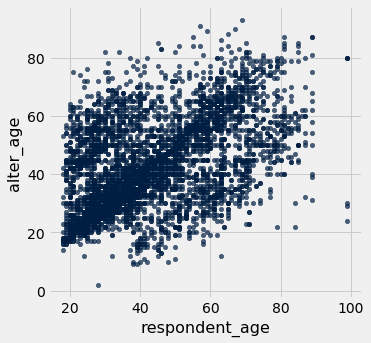

In [38]:
# SOLUTION
gss_1985_long.scatter('respondent_age', 'alter_age')

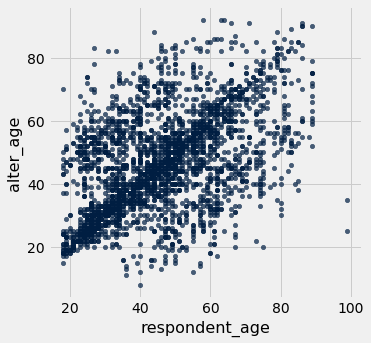

In [39]:
# SOLUTION
gss_2004_long.scatter('respondent_age', 'alter_age')

**Question** What do the scatter plots you made suggest about homophily in Americans' confidant networks? How similar or different are these patterns to what we saw from our survey of Berkeley students? (Note: there is no single right answer here -- I just want you to interpret the plots and provide an argument for why your interpretation might be right.)

[answer here]

# Adjacency Matrices and Adjacency Lists

**Question** <br>
Consider the undirected graph as shown in the figure below.

<img src="Graph1.png" width="360" height="240" align="center"/>

<ol>
<li>Write down the adjacency matrix for this graph.</li>
<li>Write down the adjacency list for this graph (there can be different ways to represent an adjacency list).</li>
<li>Which representation is better for this graph and why?</li>
</ol>

In [ ]:
# 1. Assuming that every node is connected to itself

Adj_Matrix=[[1,0,1,0,0,0,0,0],#a
            [0,1,1,1,0,0,0,0],#b
            [1,1,1,1,0,0,0,0],#c
            [0,1,1,1,0,0,0,0],#d
            [0,0,0,0,1,1,1,0],#e
            [0,0,0,0,1,1,0,0],#f
            [0,0,0,0,1,0,1,0],#g
            [0,0,0,0,0,0,0,1] #h
           ]

#2.
Adjacency_List=[('a','c'),('c','d'),('c','b'),('b','d'),('e','f'),('e','g')]

#3.
'''
As it is a relatively sparse graph, hence representing it as an adjacency list would be better from memory usage 
perspective. However, the decision of representation also depends on the operations to be performed on the graph.
'''

#### **Question** <br>
Now consider the following graph

<img src="5_18.png" width="240" height="180" align="center"/>
<br>
Which representation (adjacency list or adjacency matrix) is better for this graph? Write down the representation that you think is better for this graph.

In [ ]:
'''
Adj Matrix would be better as it is a fully connected (dense graph)
Adj_Matrix=[[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]]
'''

# Breadth first search

In class, we did an example using the ARPANET graph that systematically compute the distance between one node (MIT) and every other node (lecture 2). The searching algorithm we used is called breadth first search. Use this algorithm and calculate the longest distance between two nodes in the following graph.

<img src="bfs.png" width="240" height="180" align="center"/>
<br>


**Question** Write down the steps for searching in the following box and enter the longest distance between each pair of nodes as q17.

In [ ]:
# Begin with A
d1 = make_array(...) # Nodes that have distance 1 with A
...

q17 = ...

In [40]:
# SOLUTION
# Begin with A
d1 = make_array('B', 'C', 'D', 'G', 'F') # Nodes that have distance 1 with A
d2 = make_array('E', 'H')
d3 = make_array('I')

q17 = 3

In [41]:
_ = hw02.grade('q17')

NameError: name 'ok' is not defined

# SUBMIT YOUR ASSIGNMENT

You can rerun all the tests before submitting the homework if you'd like to.

In [ ]:
import os
print("Running all tests...")
_ = [hw02.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")